# Principal Componenet Analysis

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
##Import the file
import pandas as pd
df= pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/PCA/wine.csv", encoding='latin1')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Drop Not required columns ("Type" Columns)
X  = df.iloc[:,1:]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Import and fit the model
from sklearn.decomposition import PCA
pca = PCA()

In [7]:
PC = pca.fit_transform(X)
PC 

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [8]:
PC_df = pd.DataFrame(PC)
PC_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [10]:
# Cumulative variance 
import numpy as np
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

In [11]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

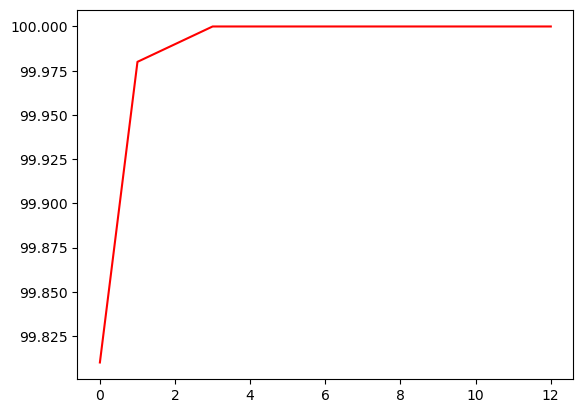

In [12]:
import matplotlib.pyplot as plt
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [13]:
PC_df.columns = ['P0C1', 'P0C2','P0C3','P0C4','P0C5','P0C6','P0C7','P0C8','P096','P0C10','P1C1', 'P1C2','P1C3']
PC_df

,P0C1,P0C2,P0C3,P0C4,P0C5,P0C6,P0C7,P0C8,P096,P0C10,P1C1,P1C2,P1C3
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


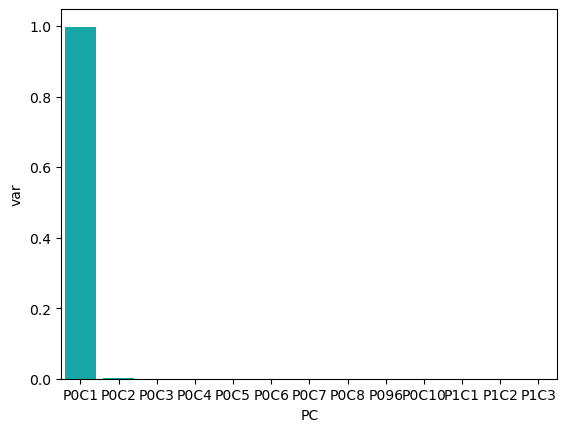

In [14]:
# Var vs PCA

import seaborn as sns

df_New = pd.DataFrame({'var':pca.explained_variance_ratio_,
                  'PC':['P0C1', 'P0C2','P0C3','P0C4','P0C5','P0C6','P0C7','P0C8','P096','P0C10','P1C1', 'P1C2','P1C3']})
df_New
sns.barplot(x='PC',y="var", data=df_New, color="c");

## From below plot we will conclude that first two PCA's are enough for analysis

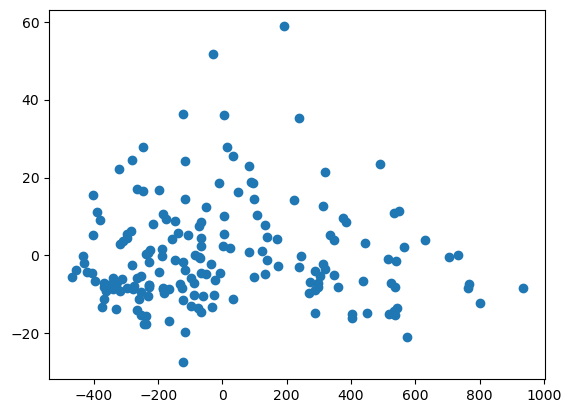

In [15]:
# plot
import matplotlib.pyplot as plt

x = PC_df.iloc[:,0:1]
y = PC_df.iloc[:,1:2]
#z = PC_df.iloc[:,2:3]
plt.scatter(x,y)

# Check the Number of clusters

In [16]:
# First two columns are enough for analysis
Final_df = PC_df.iloc[:,0:2]
Final_df

,P0C1,P0C2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [17]:
# Standardization

from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

Final_df = MM.fit_transform(Final_df)
Final_df = pd.DataFrame(Final_df,columns=["PCA1","PCA2"])
Final_df


,PCA1,PCA2
0,0.561714,0.567757
1,0.550684,0.256546
2,0.646937,0.242958
3,0.857452,0.320944
4,0.326270,0.532969
...,...,...
173,0.329544,0.266089
174,0.336755,0.345770
175,0.397608,0.536286
176,0.401173,0.535064


# Hierarchical Clustering

In [18]:
Final_df

,PCA1,PCA2
0,0.561714,0.567757
1,0.550684,0.256546
2,0.646937,0.242958
3,0.857452,0.320944
4,0.326270,0.532969
...,...,...
173,0.329544,0.266089
174,0.336755,0.345770
175,0.397608,0.536286
176,0.401173,0.535064


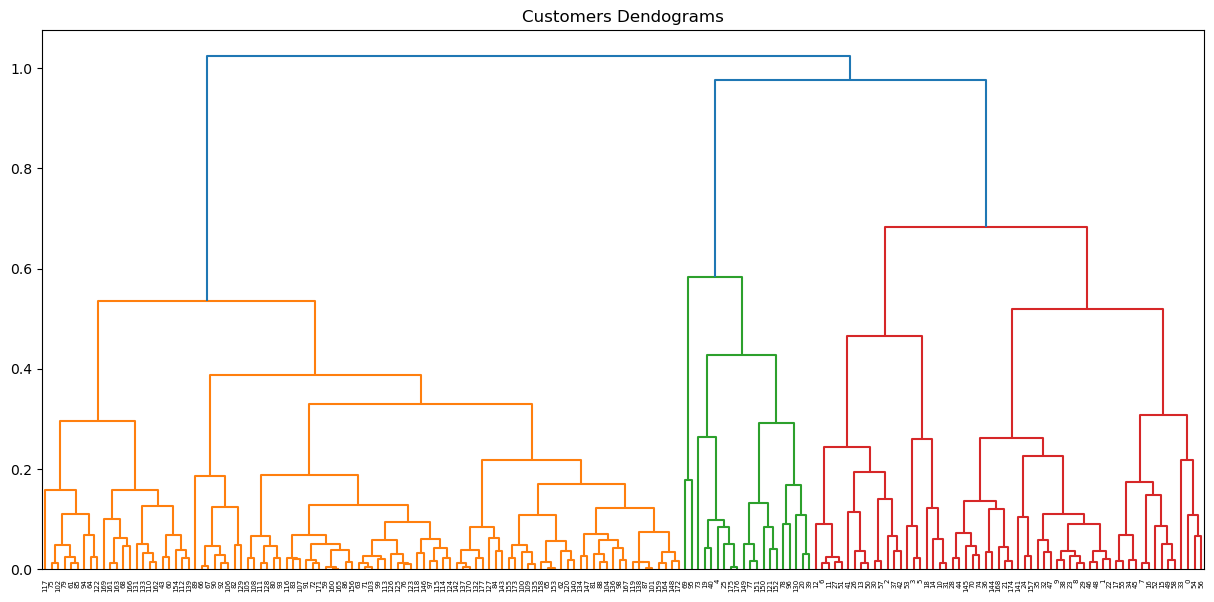

In [19]:
# Construct a dendrogram

import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7)) 
plt.title("Customers Dendograms")  
Dendrogram = SCH.dendrogram(SCH.linkage(Final_df,method ="complete"))

In [20]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
Cluster =  AgglomerativeClustering(n_clusters=3, metric = "euclidean", linkage = "complete")

Y_HC = Cluster.fit_predict(Final_df)
Y_HC

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 1], dtype=int64)

In [21]:
Cluster.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 1], dtype=int64)

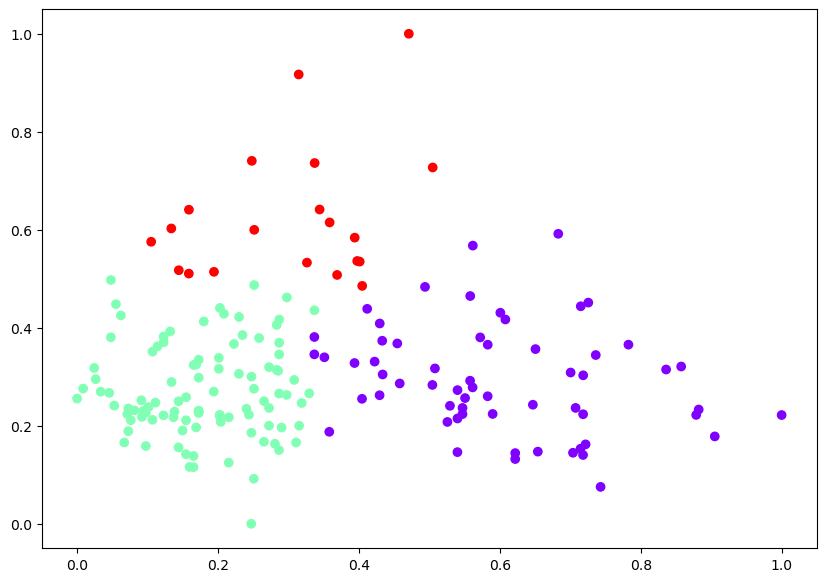

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(Final_df.iloc[:,0], Final_df.iloc[:,1], c=Cluster.labels_, cmap='rainbow')  

# K-Means clustering

In [23]:
# Find the K value for this data set
from sklearn.cluster import KMeans

Inertia_Value = []

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i , random_state=45)
    Kmeans.fit(Final_df)
    Inertia_Value.append(Kmeans.inertia_)
print(Inertia_Value)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[13.031363776244802, 6.389448206458046, 4.002668576365034, 3.212758399591821, 2.6156194398592554, 2.1904094747573466, 1.8867801294322026, 1.6761831916202472, 1.3958945766597985]


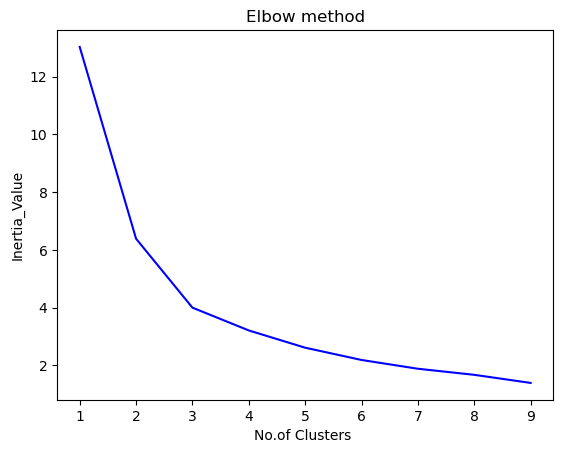

In [24]:
plt.plot(range(1,10),Inertia_Value,color="blue")
plt.xlabel("No.of Clusters ")
plt.title("Elbow method")
plt.ylabel("Inertia_Value")
plt.show()

In [25]:
# Built the cluster algorithm
from sklearn.cluster import KMeans
Cluster_new = KMeans(3,random_state=45)
Cluster_new.fit(Final_df.iloc[:,1:12])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=45)

In [26]:
Cluster_new.labels_

array([2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       2, 0])

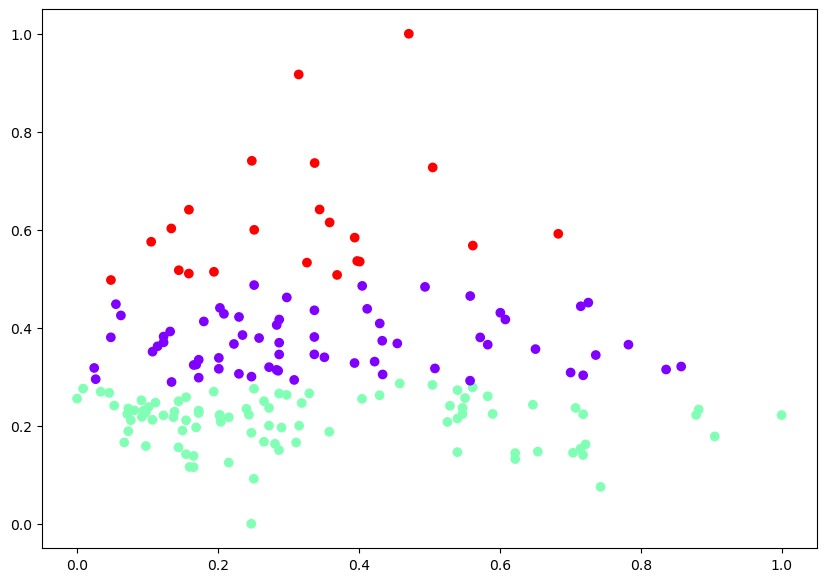

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(Final_df.iloc[:,0], Final_df.iloc[:,1], c=Cluster_new.labels_, cmap='rainbow')  

# The Obtained no.of cluster through heirarchial and k mean clusterings are same as the no.of clusters with the original data
## As per My point of view heirarchial will give the best output